In [1]:
#library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_auc_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from imblearn.combine import SMOTEENN
import os

In [2]:
#Accessing data file
data = pd.read_csv("D:/Madhubalaji/capstone/creditcard/creditcard.csv")

In [3]:
#Exploratory data analysis
print("data shape is :", data.shape)
print("Columns are :", data.columns)
print("Data types are: ", data.dtypes)

data shape is : (284807, 31)
Columns are : Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Data types are:  Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


Correlation_matrix is:             Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  3.777823e-12 -2.118614e-12 -1.733159e-13   
V2     -0.010593  3.777823e-12  1.000000e+00  2.325661e-12 -2.314981e-12   
V3     -0.419618 -2.118614e-12  2.325661e-12  1.000000e+00  2.046235e-13   
V4     -0.105260 -1.733159e-13 -2.314981e-12  2.046235e-13  1.000000e+00   
V5      0.173072 -3.473231e-12 -1.831952e-12 -4.032993e-12 -2.552389e-13   
V6     -0.063016 -1.306165e-13  9.438444e-13 -1.574471e-13  1.084041e-12   
V7      0.084714 -1.116494e-13  5.403436e-12  3.405586e-12  8.135064e-13   
V8     -0.036949  2.114527e-12  2.133785e-14 -1.272385e-12  7.334818e-13   
V9     -0.008660  3.016285e-14  3.238513e-13 -6.812351e-13 -7.143069e-13   
V10     0.030617 -2.615192e-12  1.463282e-12 -1.609126e-12 -1.938143e-12   
V11    -0.247689  1.866551e-12 -8.314960e-13  8.707055e-13  1.874

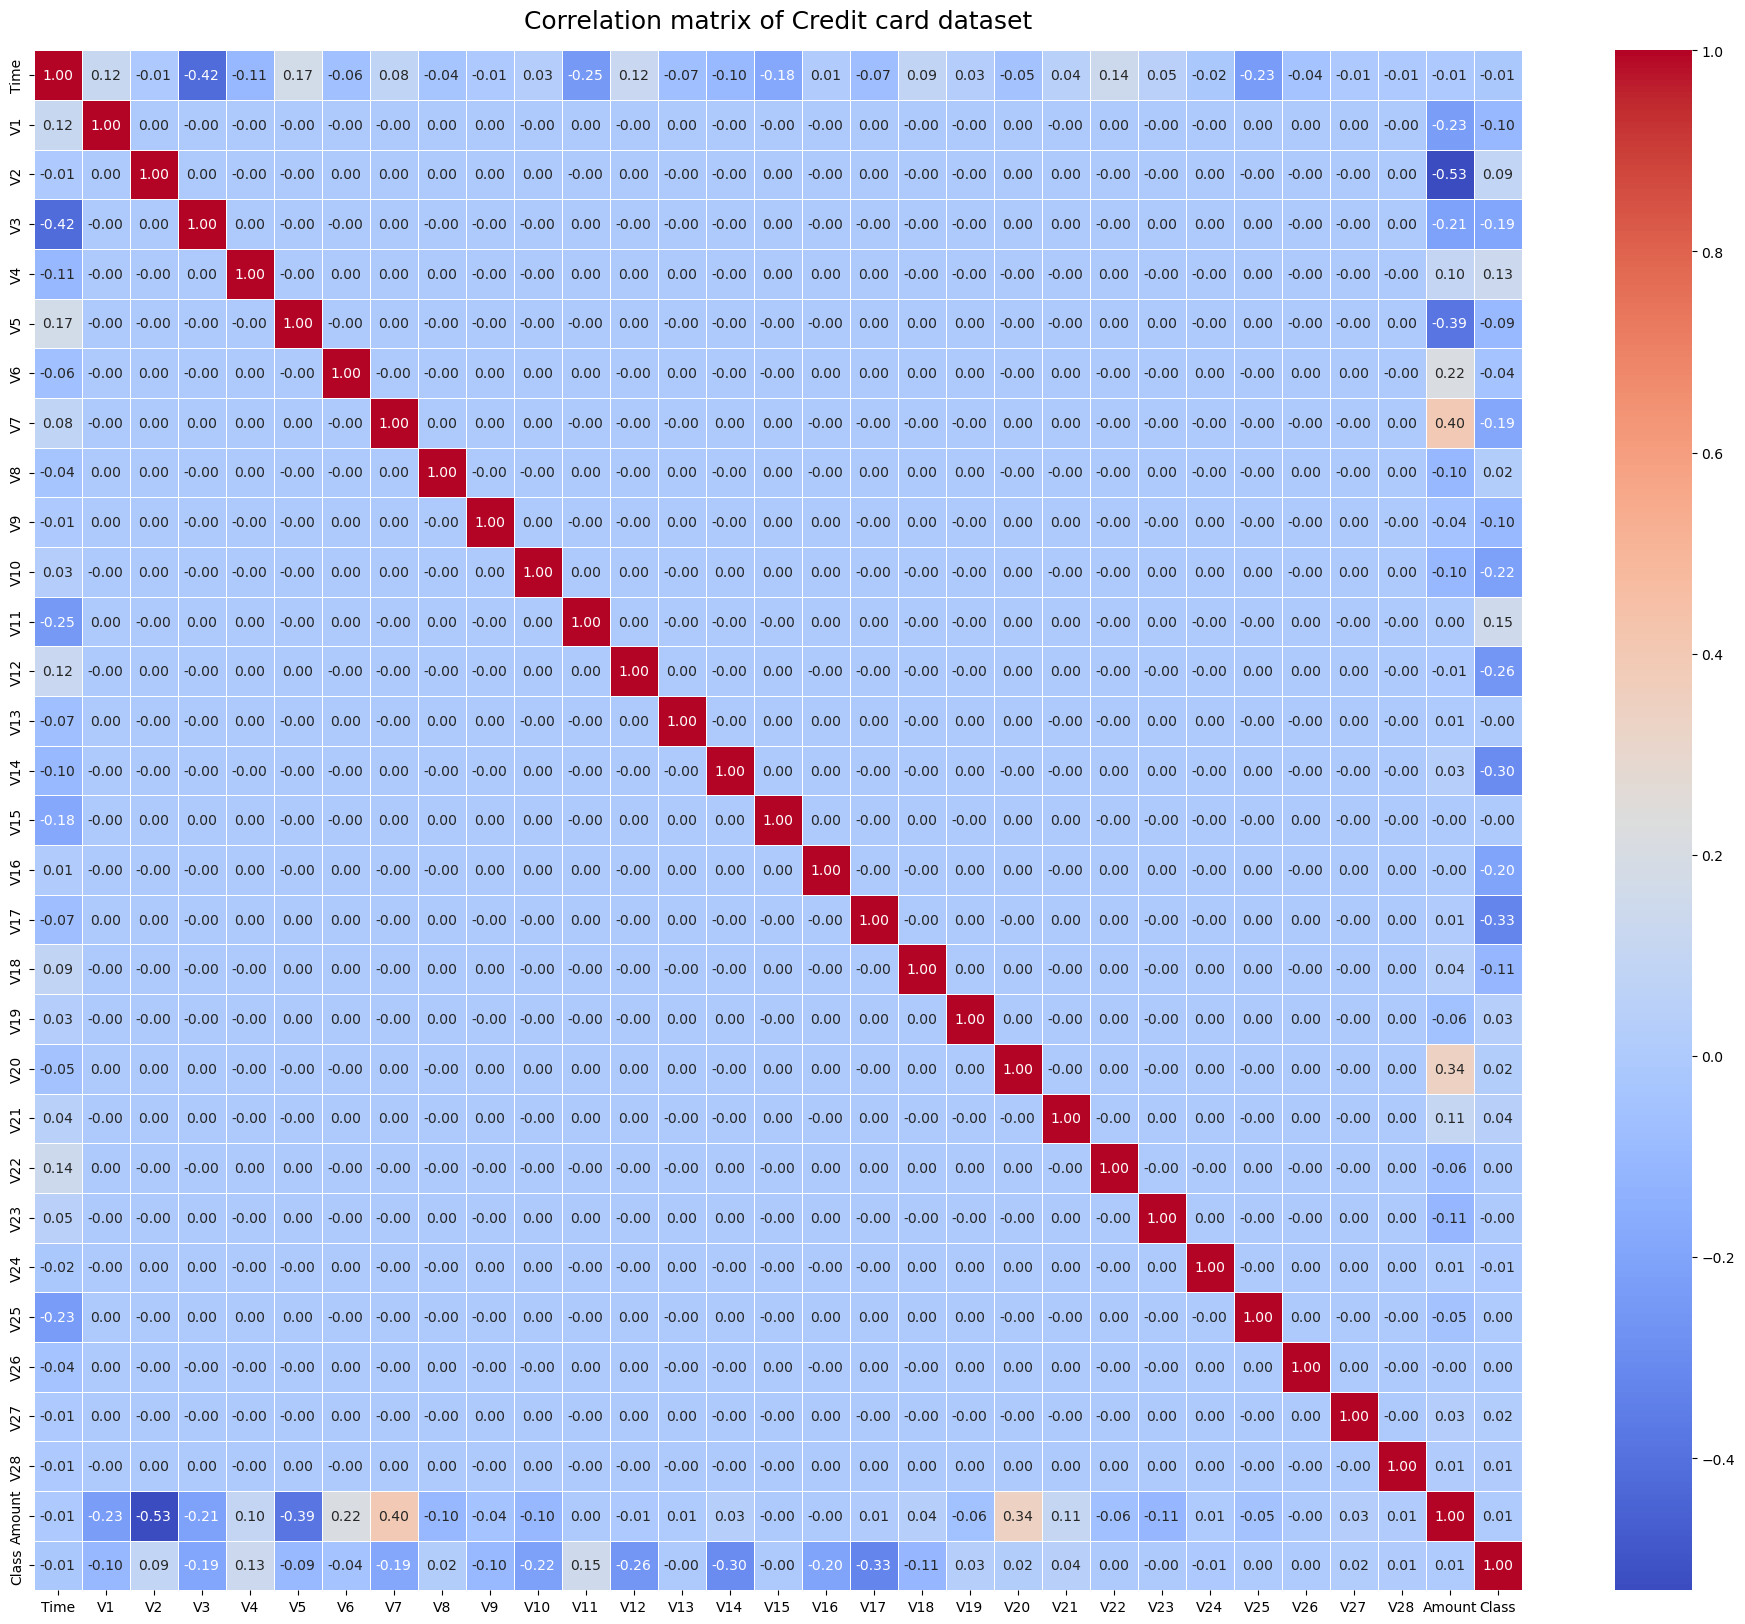

In [3]:
#Correlation matrix
corr_matrix = data.corr()
print("Correlation_matrix is:", corr_matrix)

plt.figure(figsize=(24,20))
heatmap = sns.heatmap(corr_matrix, annot= True, fmt = '.2f', cmap='coolwarm', linewidths = 0.5)
heatmap.set_title('Correlation matrix of Credit card dataset', fontdict={'fontsize':18}, pad=16)

plt.show()

In [3]:
data[TransactionFrequency] = data.V7*data.Amount
data[New_feature2] = data.V20*data.Amount

NameError: name 'New_feature1' is not defined

In [4]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.23709

In [ ]:
sns.pairplot(data)

KeyboardInterrupt: 

In [4]:
##Data quality check up and data cleaning
#check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [4]:
print("Class distribution \n", data['Class'].value_counts())

Class distribution 
 Class
0    284315
1       492
Name: count, dtype: int64


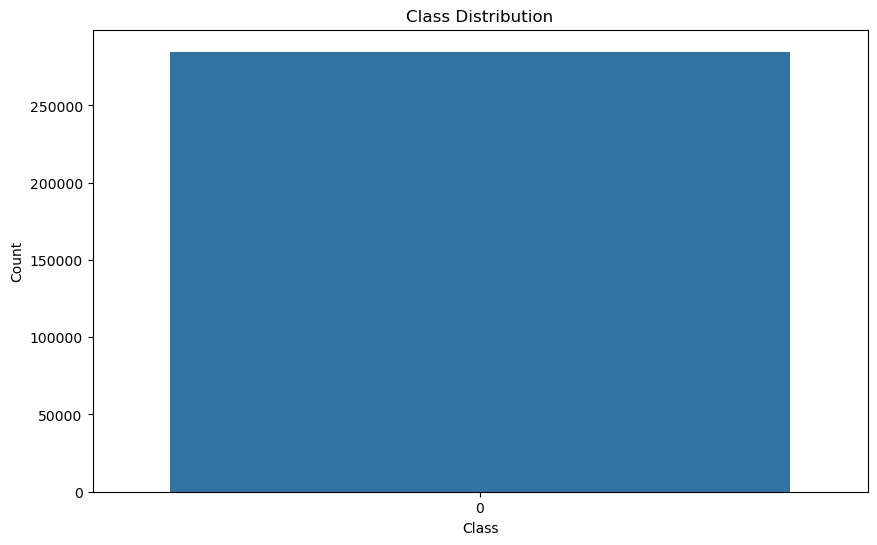

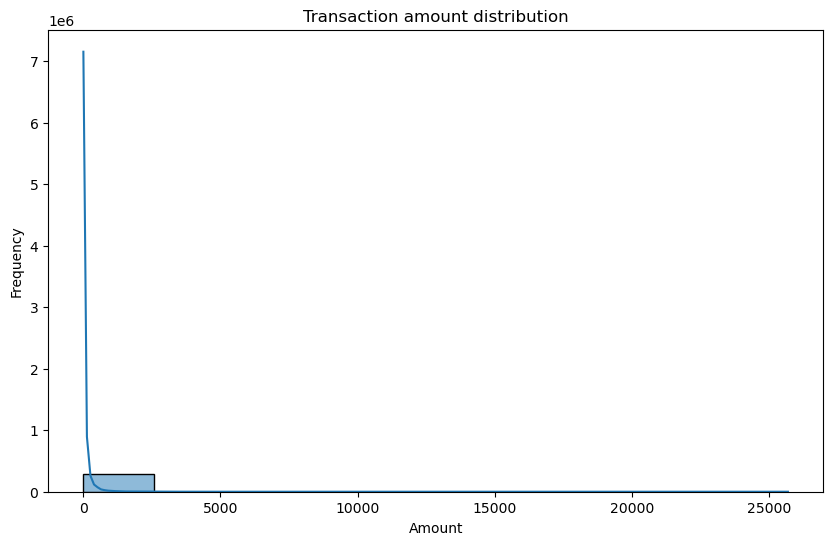

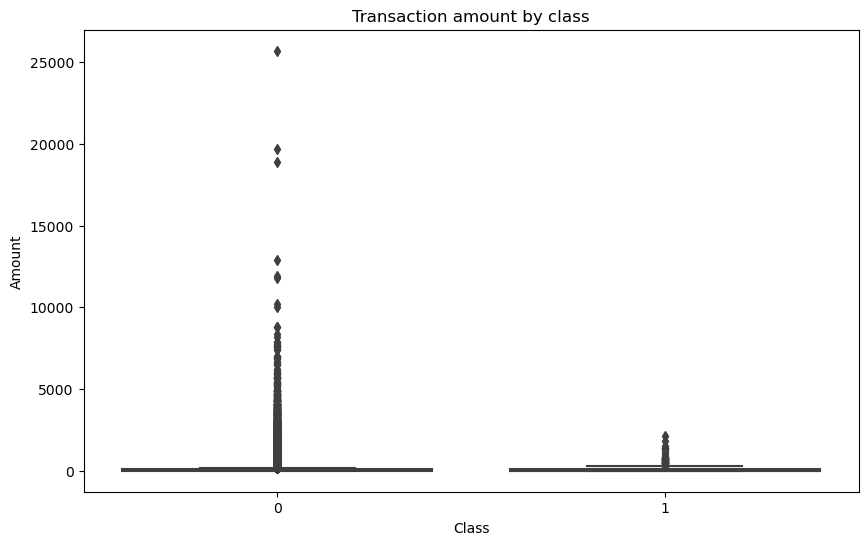

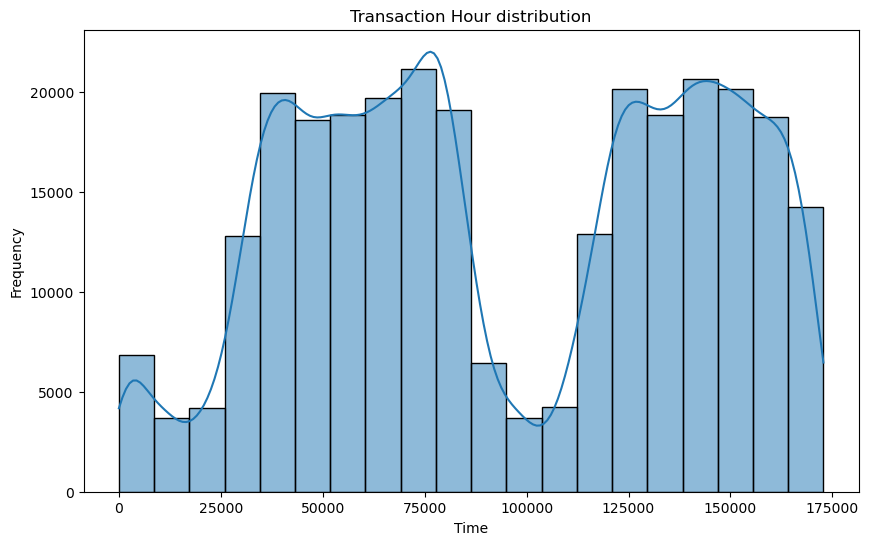

In [4]:
#Visualization
plt.figure(figsize=(10,6))
sns.countplot(data['Class'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data["Amount"], bins=10, kde= True)
plt.title('Transaction amount distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Transaction amount by class")
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data["Time"], bins=20, kde = True)
plt.title("Transaction Hour distribution")
plt.xlabel("Time")
plt.ylabel('Frequency')
plt.show()

In [4]:
X = data.drop('Class', axis=1)
y = data['Class']

In [5]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 6)

In [6]:
#Dealing with imbalanced data
#Balancing the data
#applying random oversampling
smote_en = SMOTEENN(random_state=6)
X_train_resampled, y_train_resampled = smote_en.fit_resample(X_train, y_train)

In [7]:
#scaling data
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_resampled_scaled = scaler.transform(X_test)

In [9]:
#LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_resampled_scaled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [11]:
#Evaluate model
train_accuray = log_reg.score(X_train_resampled_scaled, y_train_resampled)
test_accuracy = log_reg.score(X_test_resampled_scaled, y_test)

In [13]:
y_prediction = log_reg.predict(X_test_resampled_scaled)
conf_matrix = confusion_matrix(y_test, y_prediction)
class_report = classification_report(y_test, y_prediction)

In [14]:
print("Training accuracy : ", train_accuray)
print("Testing accuracy : ", test_accuracy)
print("Classification_report: \n", classification_report(y_test,y_prediction))
print("Confusion matrix:\n", confusion_matrix(y_test, y_prediction))

Training accuracy :  0.9813006619440251
Testing accuracy :  0.9914679962079983
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.91      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.95      0.63     56962
weighted avg       1.00      0.99      0.99     56962

Confusion matrix:
 [[56387   477]
 [    9    89]]


In [16]:
#Gradientboosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_resampled_scaled, y_train_resampled)

GradientBoostingClassifier()

In [17]:
#Evaluate model
gb_train_accuray = gb_classifier.score(X_train_resampled_scaled, y_train_resampled)
gb_test_accuracy = gb_classifier.score(X_test_resampled_scaled, y_test)

In [18]:
gb_y_pred = gb_classifier.predict(X_test_resampled_scaled)
gb_conf_matrix = confusion_matrix(y_test, gb_y_pred)
gb_class_report = classification_report(y_test, gb_y_pred)

In [19]:
print("GradientBoostingClassifier Training accuracy : \n", gb_train_accuray)
print("GradientBoostingClassifier Testing accuracy : \n", gb_test_accuracy)
print("GradientBoostingClassifier Classification_report: \n", gb_class_report)
print("GradientBoostingClassifier Confusion matrix:\n", gb_conf_matrix)

GradientBoostingClassifier Training accuracy : 
 0.9908535594007665
GradientBoostingClassifier Testing accuracy : 
 0.9932235525438011
GradientBoostingClassifier Classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.89      0.31        98

    accuracy                           0.99     56962
   macro avg       0.59      0.94      0.65     56962
weighted avg       1.00      0.99      1.00     56962

GradientBoostingClassifier Confusion matrix:
 [[56489   375]
 [   11    87]]


In [20]:
#SupportVector machine
SVC_classifier = SVC()
SVC_classifier.fit(X_train_resampled_scaled, y_train_resampled)

SVC()

In [29]:
#Evaluate model
SVC_train_accuracy = SVC_classifier.score(X_train_resampled_scaled, y_train_resampled)
SVC_test_accuracy = SVC_classifier.score(X_test_resampled_scaled, y_test)

In [32]:
SVC_y_prediction = SVC_classifier.fit(X_train_resampled_scaled, y_train_resampled).predict(X_test_resampled_scaled)
SVC_conf_matrix = confusion_matrix(y_test,SVC_y_prediction)
SVC_classreport = classification_report(y_test, SVC_y_prediction)

In [34]:
print("SVC Training accuracy : \n", SVC_train_accuracy)
print("SVC : \n", SVC_test_accuracy)
print("SVC Classification_report: \n", SVC_classreport)
print("SVC Confusion matrix:\n", SVC_conf_matrix)

SVC Training accuracy : 
 0.9970874462896295
SVC : 
 0.9974193321863699
SVC Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.89      0.54        98

    accuracy                           1.00     56962
   macro avg       0.69      0.94      0.77     56962
weighted avg       1.00      1.00      1.00     56962

SVC Confusion matrix:
 [[56728   136]
 [   11    87]]


In [8]:
##RandomForest Classifier
RF_Classifier = RandomForestClassifier()
RF_Classifier.fit(X_train_resampled_scaled, y_train_resampled)

RandomForestClassifier()

In [9]:
#Evaluate model
RFC_train_accuracy = RF_Classifier.score(X_train_resampled_scaled, y_train_resampled)
RFC_test_accuracy = RF_Classifier.score(X_test_resampled_scaled, y_test)

In [10]:
RFC_prediction = RF_Classifier.predict(X_test_resampled_scaled)
RFC_confusion_matrix = confusion_matrix(y_test, RFC_prediction)
RFC_classreport = classification_report(y_test, RFC_prediction)

In [11]:
print("RFC Training accuracy : \n", RFC_train_accuracy)
print("RFC Testing accuracy: \n", RFC_test_accuracy)
print("RFC Classification_report: \n", RFC_classreport)
print("RFC Confusion matrix:\n", RFC_confusion_matrix)

RFC Training accuracy : 
 1.0
RFC Testing accuracy: 
 0.9994733330992591
RFC Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.86      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962

RFC Confusion matrix:
 [[56848    16]
 [   14    84]]


###Best model selection

In [ ]:
#List of classification model selection
Classifiers = {
    "Support Vector Machine": SVC(),
    "Random Forest" : RandomForestClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier()
}
#Defining function to evaluate the model

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Accuracy = accuracy_score(y_test, y_pred)    
    print(Classifiers, "Classification_report: \n", classification_report(y_test,y_pred))
    print(Classifiers, "Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    return Accuracy

# defining the pipeline including SMOTE to handle imbalanced data

pipeline = Pipeline([
    ('sampling', SMOTE(random_state =6)),
    ('Classification', None)
])

#initialize lists to store results
results =[]
model_name = []
#initialize variables to store the best model and its accuray
BestModel = None
BestAccuracy = 0

#iterate over each classifier

for name, Classifiers in Classifiers.items():
    
    #Set the classifier in pipeline
    pipeline.set_params(Classification= Classifiers)
    #Evaluate the model using cross-validation
    Accuracy = evaluate_model(pipeline, X_train_resampled_scaled, X_test_scaled, y_train_resampled_scaled, y_test)
    
    results.append(Accuracy)
    model_name.append(name)
    
#creating the dataframe to store results
results_df = pd.DataFrame({
    "Model" : model_name,
    "Accuracy" : results
})

print(results_df)

if Accuracy > BestAccuracy:
    BestAccuracy = Accuracy
    BestModel = Classifiers
    
print(f"Best_model:", {BestModel})
print(f"Best_Accuracy:", {BestAccuracy})

In [12]:
# Hyperparameter tuning
param_grid = {
    'n_estimators' : [100,200],
    'max_depth' :[None, 10],
    'min_samples_split': [2,3],
    'min_samples_leaf' : [1,2]
}

In [13]:
#perform grid search
grid_search = GridSearchCV(estimator=RF_Classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled_scaled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [14]:
#best parameters
best_params = grid_search.best_params_
print("Best Parameters: \n", best_params)

Best Parameters: 
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


In [18]:
from sklearn.ensemble import RandomForestClassifier
import pickle

In [16]:
##RandomForest Classifier
RF_Classifier = RandomForestClassifier()
model= RF_Classifier.fit(X_train_resampled_scaled, y_train_resampled)

In [19]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model,f)

In [20]:
import pickle
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
    
print("Model loaded successfully")

Model loaded successfully


In [ ]:
import os
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Define the path to your model file correctly
model_path = os.path.join(os.getcwd(), 'model.pkl')

# Load the model
with open(model_path, 'rb') as f:
    model = pickle.load(f)

@app.route('/')
def home():
    return "Welcome to the model prediction API!"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([data['input']])
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=8080)

    

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8080
 * Running on http://192.168.1.68:8080
Press CTRL+C to quit
192.168.1.68 - - [15/Jun/2024 08:59:14] "GET / HTTP/1.1" 200 -
192.168.1.68 - - [15/Jun/2024 08:59:14] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [15/Jun/2024 08:59:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2024 08:59:22] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
python app.py